# Read Data from feather

In [24]:
import feather

In [25]:
loans =feather.read_dataframe('./loans_modelling_data')

In [26]:
loans.shape

(13421, 119)

# Data Preprocessing for Evaluation

## Splitting data into train and test

In [27]:
loans_train = loans.loc[loans['issue_d'] <  loans['issue_d'].quantile(0.9)]
loans_test =  loans.loc[loans['issue_d'] >= loans['issue_d'].quantile(0.9)]

In [28]:
print('Number of loans in the partition:   ', loans_train.shape[0] + loans_test.shape[0])
print('Number of loans in the full dataset:', loans.shape[0])

Number of loans in the partition:    13421
Number of loans in the full dataset: 13421


In [29]:
loans_test.shape[0] / loans.shape[0]

0.11005141196632144

In [30]:
del loans

In [31]:

loans_train.drop('issue_d', axis=1, inplace=True)
loans_test.drop('issue_d', axis=1, inplace=True)

In [32]:
y_train = loans_train['charged_off']
y_test = loans_test['charged_off']

In [33]:
X_train = loans_train.drop('charged_off', axis=1)
X_test = loans_test.drop('charged_off', axis=1)

In [34]:
del loans_train, loans_test

## Modelling

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV


In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
pipeline_rfc = Pipeline([
    ('imputer', SimpleImputer(copy=False)),
    ('model', RandomForestClassifier(n_jobs=-1, random_state=1))
])

In [38]:
param_grid_rfc = {
    'model__n_estimators': [50] # The number of randomized trees to build
}

In [39]:
grid_rfc = GridSearchCV(estimator=pipeline_rfc, param_grid=param_grid_rfc, scoring='roc_auc', n_jobs=1, pre_dispatch=1, cv=5, verbose=1, return_train_score=False)

In [40]:
grid_rfc=grid_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.6s finished


In [41]:
grid_rfc.best_score_

0.6854705849127632

In [42]:
X_train=X_train.fillna(X_train.mean()) # To remove error missing values
X_test=X_test.fillna(X_test.mean())

In [43]:
import pandas as pd
%matplotlib inline

In [44]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\user\miniconda3\envs\sm-202011\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


<AxesSubplot:>

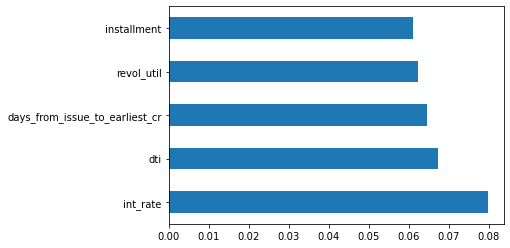

In [45]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

(pd.Series(model.feature_importances_, index=X_train.columns)
   .nlargest(5)
   .plot(kind='barh')) 

### ACCUARACY,  F1 SCORE AND ROC AUC FOR TRAIN DATA

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [47]:
# See the inital model performance
clf = RandomForestClassifier(random_state=10)
print('Acc:', cross_val_score(clf, X_train, y_train, 
                              cv=StratifiedKFold(n_splits=5), 
                              scoring='accuracy').mean())
print('F1:', cross_val_score(clf, X_train, y_train, 
                             cv=StratifiedKFold(n_splits=5), 
                             scoring='f1').mean())
print('ROC AUC:', cross_val_score(clf, X_train, y_train, 
                                  cv=StratifiedKFold(n_splits=5), 
                                  scoring='roc_auc').mean())

C:\Users\user\miniconda3\envs\sm-202011\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\miniconda3\envs\sm-202011\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\miniconda3\envs\sm-202011\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\miniconda3\envs\sm-202011\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\mi

Acc: 0.7962999239941215


C:\Users\user\miniconda3\envs\sm-202011\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\miniconda3\envs\sm-202011\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\miniconda3\envs\sm-202011\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\miniconda3\envs\sm-202011\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\mi

F1: 0.17259187141535873


C:\Users\user\miniconda3\envs\sm-202011\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\miniconda3\envs\sm-202011\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\miniconda3\envs\sm-202011\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\miniconda3\envs\sm-202011\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\user\mi

ROC AUC: 0.6415404545470327


### Prediction on test data

In [48]:
from sklearn import model_selection
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

C:\Users\user\miniconda3\envs\sm-202011\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [49]:
y_score = rfc.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_score)

0.6705236465693394

#### Confusion Matrix for test data

In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [51]:
rfc_cv_score =cross_val_score(rfc, X_train, y_train, cv=10, scoring='roc_auc')

In [52]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[1161   47]
 [ 238   31]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1208
           1       0.40      0.12      0.18       269

    accuracy                           0.81      1477
   macro avg       0.61      0.54      0.53      1477
weighted avg       0.75      0.81      0.76      1477



=== All AUC Scores ===
[0.6536618  0.67029846 0.66478118 0.67995859 0.62196299 0.64051776
 0.63547345 0.64068396 0.64397079 0.64096056]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.6492269553863903


#### ROC Curve

In [53]:
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve

In [54]:
import matplotlib.pyplot as plt

In [55]:
y_pred_proba = rfc.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba)

In [56]:
roc_auc = metrics.auc(fpr, tpr)

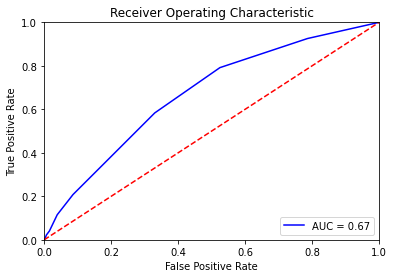

In [57]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [58]:
roc_auc_score(y_test,y_pred_proba)

0.6705236465693394

#### Precision Recall Curve

In [59]:
from sklearn.metrics import precision_recall_curve

In [60]:
from sklearn.metrics import auc

In [61]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

In [62]:
# calculate precision-recall AUC
auc_prc = auc(recall, precision)
print(auc_prc)

0.2909826153774322


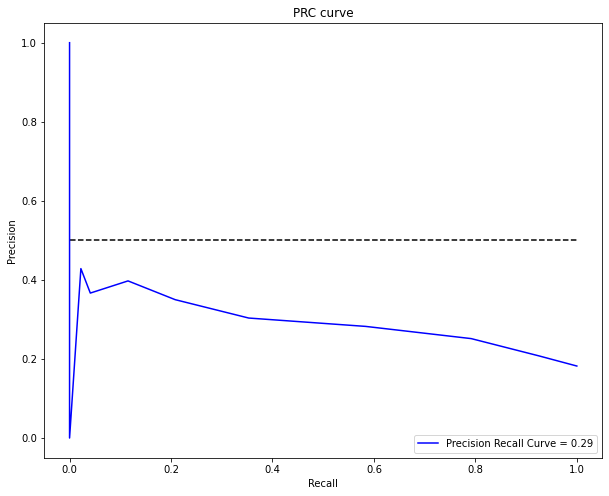

In [63]:
plt.figure(figsize = (10,8))
plt.plot([0, 1], [0.5, 0.5],'k--')
plt.plot(recall, precision,'b', label = 'Precision Recall Curve = %0.2f' % auc_prc)
plt.legend(loc = 'lower right')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PRC curve')
plt.show()